In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet import ResNet152
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow import keras
from keras import optimizers
import numpy as np
import os
import cv2
from glob import glob
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from IPython.display import Image
from tensorflow.keras.models import load_model

In [2]:
from itertools import cycle
#from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
#from tensorflow.keras.metrics import auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [4]:
train_path = 'D:/MScCS/thesis/Dataset/new/train'
valid_path = 'D:/MScCS/thesis/Dataset/new/test'

In [5]:
# Import the VGG16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet152(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [6]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [7]:
# useful for getting number of output classes
folders = glob('D:/MScCS/thesis/Dataset/new/train/*')

In [8]:
#layers
x = Flatten()(resnet.output)

In [9]:
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [10]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block6_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block6_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block6_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block6_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block6_3_conv (Conv2D)   (None, 28, 28, 512)  66048       ['conv3_block6_2_relu[0][0]']    
                                                                                                  
 conv3_block6_3_bn (BatchNormal  (None, 28, 28, 512)  2048       ['conv3_block6_3_conv[0][0]']    
 ization) 

 n)                                                                                               
                                                                                                  
 conv4_block1_0_conv (Conv2D)   (None, 14, 14, 1024  525312      ['conv3_block8_out[0][0]']       
                                )                                                                 
                                                                                                  
 conv4_block1_3_conv (Conv2D)   (None, 14, 14, 1024  263168      ['conv4_block1_2_relu[0][0]']    
                                )                                                                 
                                                                                                  
 conv4_block1_0_bn (BatchNormal  (None, 14, 14, 1024  4096       ['conv4_block1_0_conv[0][0]']    
 ization)                       )                                                                 
          

                                                                                                  
 conv4_block4_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block4_1_relu[0][0]']    
                                                                                                  
 conv4_block4_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block4_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block4_2_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block4_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block4_3_conv (Conv2D)   (None, 14, 14, 1024  263168      ['conv4_block4_2_relu[0][0]']    
          

 n)                                                                                               
                                                                                                  
 conv4_block7_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block7_1_relu[0][0]']    
                                                                                                  
 conv4_block7_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block7_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block7_2_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block7_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_blo

 conv4_block10_1_relu (Activati  (None, 14, 14, 256)  0          ['conv4_block10_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block10_2_conv (Conv2D)  (None, 14, 14, 256)  590080      ['conv4_block10_1_relu[0][0]']   
                                                                                                  
 conv4_block10_2_bn (BatchNorma  (None, 14, 14, 256)  1024       ['conv4_block10_2_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block10_2_relu (Activati  (None, 14, 14, 256)  0          ['conv4_block10_2_bn[0][0]']     
 on)                                                                                              
          

                                                                                                  
 conv4_block13_1_relu (Activati  (None, 14, 14, 256)  0          ['conv4_block13_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block13_2_conv (Conv2D)  (None, 14, 14, 256)  590080      ['conv4_block13_1_relu[0][0]']   
                                                                                                  
 conv4_block13_2_bn (BatchNorma  (None, 14, 14, 256)  1024       ['conv4_block13_2_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block13_2_relu (Activati  (None, 14, 14, 256)  0          ['conv4_block13_2_bn[0][0]']     
 on)      

 lization)                                                                                        
                                                                                                  
 conv4_block16_1_relu (Activati  (None, 14, 14, 256)  0          ['conv4_block16_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block16_2_conv (Conv2D)  (None, 14, 14, 256)  590080      ['conv4_block16_1_relu[0][0]']   
                                                                                                  
 conv4_block16_2_bn (BatchNorma  (None, 14, 14, 256)  1024       ['conv4_block16_2_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_blo

 conv4_block19_1_bn (BatchNorma  (None, 14, 14, 256)  1024       ['conv4_block19_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block19_1_relu (Activati  (None, 14, 14, 256)  0          ['conv4_block19_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block19_2_conv (Conv2D)  (None, 14, 14, 256)  590080      ['conv4_block19_1_relu[0][0]']   
                                                                                                  
 conv4_block19_2_bn (BatchNorma  (None, 14, 14, 256)  1024       ['conv4_block19_2_conv[0][0]']   
 lization)                                                                                        
          

                                                                                                  
 conv4_block22_1_bn (BatchNorma  (None, 14, 14, 256)  1024       ['conv4_block22_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block22_1_relu (Activati  (None, 14, 14, 256)  0          ['conv4_block22_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block22_2_conv (Conv2D)  (None, 14, 14, 256)  590080      ['conv4_block22_1_relu[0][0]']   
                                                                                                  
 conv4_block22_2_bn (BatchNorma  (None, 14, 14, 256)  1024       ['conv4_block22_2_conv[0][0]']   
 lization)

 conv4_block25_1_conv (Conv2D)  (None, 14, 14, 256)  262400      ['conv4_block24_out[0][0]']      
                                                                                                  
 conv4_block25_1_bn (BatchNorma  (None, 14, 14, 256)  1024       ['conv4_block25_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block25_1_relu (Activati  (None, 14, 14, 256)  0          ['conv4_block25_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block25_2_conv (Conv2D)  (None, 14, 14, 256)  590080      ['conv4_block25_1_relu[0][0]']   
                                                                                                  
 conv4_blo

                                                                                                  
 conv4_block28_1_conv (Conv2D)  (None, 14, 14, 256)  262400      ['conv4_block27_out[0][0]']      
                                                                                                  
 conv4_block28_1_bn (BatchNorma  (None, 14, 14, 256)  1024       ['conv4_block28_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block28_1_relu (Activati  (None, 14, 14, 256)  0          ['conv4_block28_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block28_2_conv (Conv2D)  (None, 14, 14, 256)  590080      ['conv4_block28_1_relu[0][0]']   
          

                                )                                                                 
                                                                                                  
 conv4_block31_1_conv (Conv2D)  (None, 14, 14, 256)  262400      ['conv4_block30_out[0][0]']      
                                                                                                  
 conv4_block31_1_bn (BatchNorma  (None, 14, 14, 256)  1024       ['conv4_block31_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block31_1_relu (Activati  (None, 14, 14, 256)  0          ['conv4_block31_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_blo

 conv4_block33_out (Activation)  (None, 14, 14, 1024  0          ['conv4_block33_add[0][0]']      
                                )                                                                 
                                                                                                  
 conv4_block34_1_conv (Conv2D)  (None, 14, 14, 256)  262400      ['conv4_block33_out[0][0]']      
                                                                                                  
 conv4_block34_1_bn (BatchNorma  (None, 14, 14, 256)  1024       ['conv4_block34_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block34_1_relu (Activati  (None, 14, 14, 256)  0          ['conv4_block34_1_bn[0][0]']     
 on)                                                                                              
          

                                                                                                  
 conv4_block36_out (Activation)  (None, 14, 14, 1024  0          ['conv4_block36_add[0][0]']      
                                )                                                                 
                                                                                                  
 conv5_block1_1_conv (Conv2D)   (None, 7, 7, 512)    524800      ['conv4_block36_out[0][0]']      
                                                                                                  
 conv5_block1_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block1_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block1_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block1_1_bn[0][0]']      
 n)       

                                                                  'conv5_block3_3_bn[0][0]']      
                                                                                                  
 conv5_block3_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block3_add[0][0]']       
                                                                                                  
 flatten (Flatten)              (None, 100352)       0           ['conv5_block3_out[0][0]']       
                                                                                                  
 dense (Dense)                  (None, 4)            401412      ['flatten[0][0]']                
                                                                                                  
Total params: 58,772,356
Trainable params: 401,412
Non-trainable params: 58,370,944
__________________________________________________________________________________________________


In [11]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer=optimizer,
  metrics=['accuracy']
)

In [12]:
#from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   rotation_range= 15,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
training_set = train_datagen.flow_from_directory('D:/MScCS/thesis/Dataset/new/train',
                                                 target_size = (224, 224),
                                                 batch_size = 8,
                                                 class_mode = 'categorical')

Found 800 images belonging to 4 classes.


In [14]:
test_set = test_datagen.flow_from_directory('D:/MScCS/thesis/Dataset/new/test',
                                            target_size = (224, 224),
                                            batch_size = 8,
                                            class_mode = 'categorical')

Found 200 images belonging to 4 classes.


In [15]:
itr = test_datagen.flow_from_directory(
'D:/MScCS/thesis/Dataset/new/test',
target_size=(224,224),
batch_size=8,
class_mode='categorical')

#X, y = itr.next()
x_test, y_test = itr.next()

n_classes = 4
lw = 2

Found 200 images belonging to 4 classes.


In [16]:
def plot_roc_curve():
    #roc curve plot

    y_score = model.predict(x_test)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure()
    plt.plot(
        fpr["micro"],
        tpr["micro"],
        label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
        color="deeppink",
        linestyle=":",
        linewidth=4,
    )

    plt.plot(
        fpr["macro"],
        tpr["macro"],
        label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
        color="navy",
        linestyle=":",
        linewidth=4,
    )

    colors = cycle(["aqua", "darkorange", "cornflowerblue", "green"])
    for i, color in zip(range(n_classes), colors):
        if(i == 0):
            plt.plot(
                fpr[i],
                tpr[i],
                color=color,
                lw=lw,
                label="ROC curve of cocci (area = {1:0.2f})".format(i, roc_auc[i]),
            )
        if(i == 1):
            plt.plot(
                fpr[i],
                tpr[i],
                color=color,
                lw=lw,
                label="ROC curve of healthy (area = {1:0.2f})".format(i, roc_auc[i]),
            )
        if(i == 2):
            plt.plot(
                fpr[i],
                tpr[i],
                color=color,
                lw=lw,
                label="ROC curve of ncd (area = {1:0.2f})".format(i, roc_auc[i]),
            )
        if(i == 3):
            plt.plot(
                fpr[i],
                tpr[i],
                color=color,
                lw=lw,
                label="ROC curve of salmo (area = {1:0.2f})".format(i, roc_auc[i]),
            )
    plt.plot([0, 1], [0, 1], "k--", lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic to multiclass")
    plt.legend(loc="lower right")
    plt.show()


In [17]:
def plot_loss_acc():
    # plotting the loss
    plt.plot(r.history['loss'], label='train loss')
    plt.plot(r.history['val_loss'], label='val loss')
    plt.legend()
    plt.ylim(-0.05, 1.1)
    plt.show()

    # plotting the accuracy
    plt.plot(r.history['accuracy'], label='train accuracy')
    plt.plot(r.history['val_accuracy'], label='val accuracy')
    plt.legend()
    plt.ylim(-0.05, 1.1)
    plt.show()

In [18]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
100/100 [==============================] - 68s 500ms/step - loss: 1.3776 - accuracy: 0.3450 - val_loss: 1.2368 - val_accuracy: 0.3950
Epoch 2/10
100/100 [==============================] - 44s 436ms/step - loss: 1.2059 - accuracy: 0.4825 - val_loss: 1.2295 - val_accuracy: 0.3550
Epoch 3/10
100/100 [==============================] - 44s 440ms/step - loss: 1.1366 - accuracy: 0.5163 - val_loss: 1.1916 - val_accuracy: 0.4150
Epoch 4/10
100/100 [==============================] - 43s 433ms/step - loss: 1.0796 - accuracy: 0.5450 - val_loss: 1.1016 - val_accuracy: 0.5400
Epoch 5/10
100/100 [==============================] - 43s 427ms/step - loss: 1.0385 - accuracy: 0.5625 - val_loss: 1.0878 - val_accuracy: 0.4650
Epoch 6/10
100/100 [==============================] - 43s 434ms/step - loss: 1.0693 - accuracy: 0.5475 - val_loss: 1.1504 - val_accuracy: 0.4850
Epoch 7/10
100/100 [==============================] - 40s 400ms/step - loss: 0.9893 - accuracy: 0.5900 - val_loss: 1.0342 - val_ac

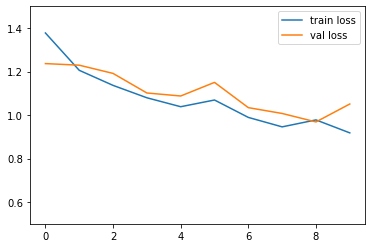

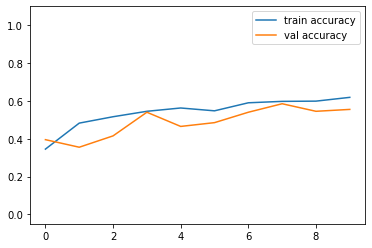

In [20]:
# plotting the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.ylim(0.5, 1.5)
plt.show()

    # plotting the accuracy
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.ylim(-0.05, 1.1)
plt.show()

1/1 [==============================] - 2s 2s/step


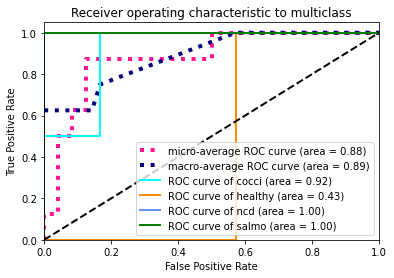

In [21]:
plot_roc_curve()

In [22]:
model.save('./models/resnet1520001_10.h5')

In [23]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=15,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/15
100/100 [==============================] - 42s 417ms/step - loss: 0.9574 - accuracy: 0.6075 - val_loss: 1.0490 - val_accuracy: 0.5200
Epoch 2/15
100/100 [==============================] - 42s 419ms/step - loss: 0.9006 - accuracy: 0.6300 - val_loss: 0.8986 - val_accuracy: 0.6350
Epoch 3/15
100/100 [==============================] - 41s 409ms/step - loss: 0.8567 - accuracy: 0.6400 - val_loss: 0.8501 - val_accuracy: 0.6500
Epoch 4/15
100/100 [==============================] - 42s 419ms/step - loss: 0.8489 - accuracy: 0.6550 - val_loss: 0.9107 - val_accuracy: 0.6300
Epoch 5/15
100/100 [==============================] - 42s 420ms/step - loss: 0.8626 - accuracy: 0.6425 - val_loss: 0.8276 - val_accuracy: 0.6700
Epoch 6/15
100/100 [==============================] - 42s 415ms/step - loss: 0.8040 - accuracy: 0.6963 - val_loss: 0.8732 - val_accuracy: 0.6300
Epoch 7/15
100/100 [==============================] - 41s 411ms/step - loss: 0.8740 - accuracy: 0.6413 - val_loss: 0.8949 - val_ac

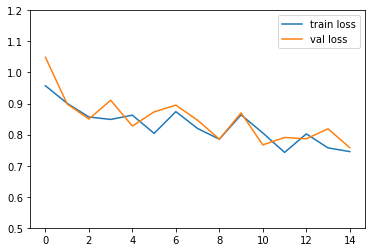

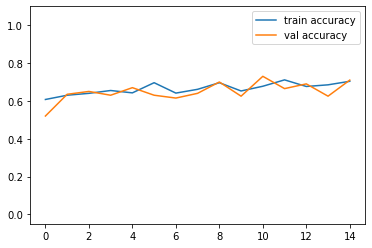

In [25]:
# plotting the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.ylim(0.5, 1.2)
plt.show()

    # plotting the accuracy
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.ylim(-0.05, 1.1)
plt.show()


1/1 [==============================] - 0s 44ms/step


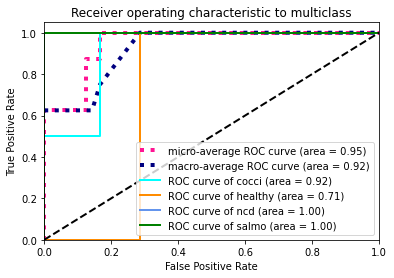

In [26]:
plot_roc_curve()
model.save('./models/resnet1520001_15.h5')

In [27]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/20
100/100 [==============================] - 42s 417ms/step - loss: 0.7392 - accuracy: 0.7287 - val_loss: 0.8212 - val_accuracy: 0.6300
Epoch 2/20
100/100 [==============================] - 41s 412ms/step - loss: 0.7532 - accuracy: 0.6988 - val_loss: 0.8061 - val_accuracy: 0.6450
Epoch 3/20
100/100 [==============================] - 40s 401ms/step - loss: 0.7375 - accuracy: 0.7163 - val_loss: 0.8123 - val_accuracy: 0.6550
Epoch 4/20
100/100 [==============================] - 42s 418ms/step - loss: 0.7276 - accuracy: 0.7063 - val_loss: 0.7540 - val_accuracy: 0.6800
Epoch 5/20
100/100 [==============================] - 42s 416ms/step - loss: 0.7306 - accuracy: 0.7100 - val_loss: 0.7605 - val_accuracy: 0.6850
Epoch 6/20
100/100 [==============================] - 42s 416ms/step - loss: 0.7187 - accuracy: 0.7200 - val_loss: 0.7323 - val_accuracy: 0.7200
Epoch 7/20
100/100 [==============================] - 41s 413ms/step - loss: 0.7602 - accuracy: 0.6800 - val_loss: 0.8458 - val_ac

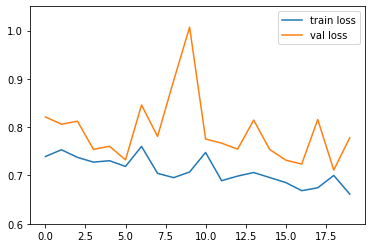

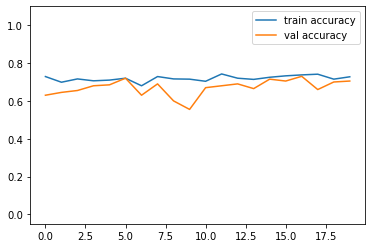

1/1 [==============================] - 0s 44ms/step


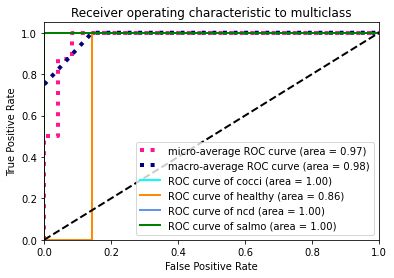

In [28]:
# plotting the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.ylim(0.6, 1.05)
plt.show()

    # plotting the accuracy
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.ylim(-0.05, 1.1)
plt.show()


plot_roc_curve()

In [29]:
model.save('./models/resnet1520001_20.h5')

In [30]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=25,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/25
100/100 [==============================] - 41s 408ms/step - loss: 0.6656 - accuracy: 0.7450 - val_loss: 0.7337 - val_accuracy: 0.7450
Epoch 2/25
100/100 [==============================] - 40s 396ms/step - loss: 0.6981 - accuracy: 0.7225 - val_loss: 0.8729 - val_accuracy: 0.6050
Epoch 3/25
100/100 [==============================] - 39s 393ms/step - loss: 0.6966 - accuracy: 0.7163 - val_loss: 0.8022 - val_accuracy: 0.6700
Epoch 4/25
100/100 [==============================] - 51s 515ms/step - loss: 0.6784 - accuracy: 0.7462 - val_loss: 0.6613 - val_accuracy: 0.7950
Epoch 5/25
100/100 [==============================] - 99s 992ms/step - loss: 0.6598 - accuracy: 0.7425 - val_loss: 0.7211 - val_accuracy: 0.7150
Epoch 6/25
100/100 [==============================] - 98s 984ms/step - loss: 0.6937 - accuracy: 0.7387 - val_loss: 0.6835 - val_accuracy: 0.7300
Epoch 7/25
100/100 [==============================] - 58s 579ms/step - loss: 0.6374 - accuracy: 0.7688 - val_loss: 0.9450 - val_ac

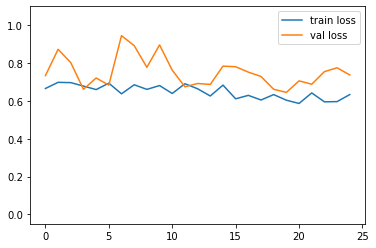

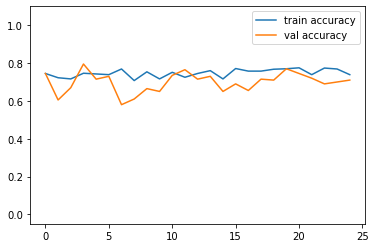

1/1 [==============================] - 0s 38ms/step


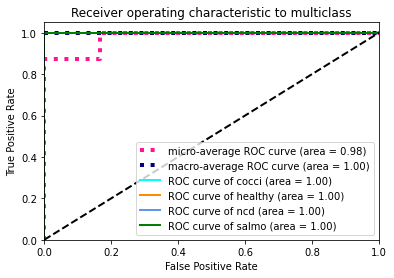

In [31]:
plot_loss_acc()
plot_roc_curve()
model.save('./models/resnet1520001_25.h5')

In [32]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/30
100/100 [==============================] - 38s 379ms/step - loss: 0.6046 - accuracy: 0.7800 - val_loss: 0.8542 - val_accuracy: 0.6150
Epoch 2/30
100/100 [==============================] - 37s 367ms/step - loss: 0.6100 - accuracy: 0.7588 - val_loss: 0.6027 - val_accuracy: 0.7800
Epoch 3/30
100/100 [==============================] - 37s 368ms/step - loss: 0.5437 - accuracy: 0.8050 - val_loss: 0.6528 - val_accuracy: 0.7450
Epoch 4/30
100/100 [==============================] - 36s 359ms/step - loss: 0.6773 - accuracy: 0.7375 - val_loss: 0.8776 - val_accuracy: 0.6350
Epoch 5/30
100/100 [==============================] - 34s 340ms/step - loss: 0.5871 - accuracy: 0.7812 - val_loss: 0.6240 - val_accuracy: 0.7350
Epoch 6/30
100/100 [==============================] - 34s 342ms/step - loss: 0.5970 - accuracy: 0.7750 - val_loss: 0.7412 - val_accuracy: 0.7050
Epoch 7/30
100/100 [==============================] - 35s 351ms/step - loss: 0.5832 - accuracy: 0.7688 - val_loss: 0.6121 - val_ac

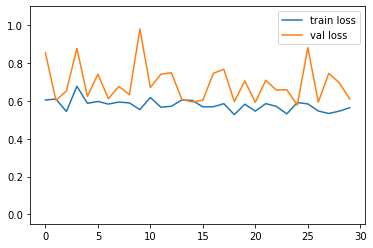

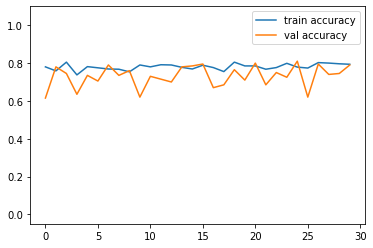

1/1 [==============================] - 0s 39ms/step


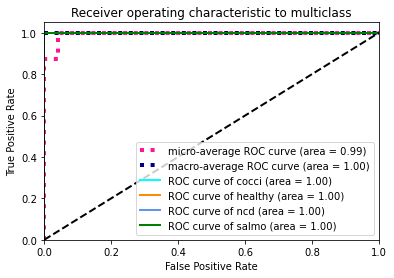

In [33]:
plot_loss_acc()
plot_roc_curve()
model.save('./models/resnet1520001_30.h5')

In [34]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=35,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/35
100/100 [==============================] - 38s 381ms/step - loss: 0.5620 - accuracy: 0.7900 - val_loss: 0.6472 - val_accuracy: 0.7450
Epoch 2/35
100/100 [==============================] - 37s 370ms/step - loss: 0.5735 - accuracy: 0.7825 - val_loss: 0.6476 - val_accuracy: 0.7200
Epoch 3/35
100/100 [==============================] - 37s 373ms/step - loss: 0.5268 - accuracy: 0.7987 - val_loss: 0.6240 - val_accuracy: 0.7300
Epoch 4/35
100/100 [==============================] - 37s 370ms/step - loss: 0.5062 - accuracy: 0.8225 - val_loss: 0.6460 - val_accuracy: 0.7550
Epoch 5/35
100/100 [==============================] - 37s 370ms/step - loss: 0.5172 - accuracy: 0.8050 - val_loss: 0.7121 - val_accuracy: 0.7000
Epoch 6/35
100/100 [==============================] - 37s 369ms/step - loss: 0.5220 - accuracy: 0.8087 - val_loss: 0.8530 - val_accuracy: 0.6600
Epoch 7/35
100/100 [==============================] - 37s 373ms/step - loss: 0.5378 - accuracy: 0.8000 - val_loss: 0.5836 - val_ac

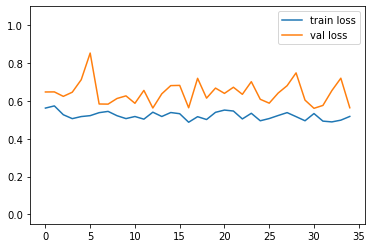

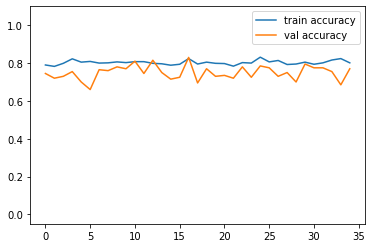

1/1 [==============================] - 0s 37ms/step


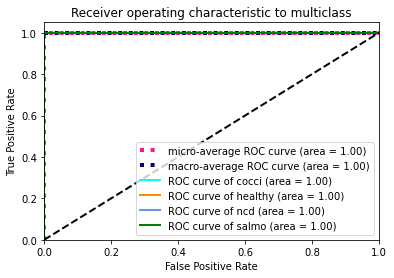

In [35]:
plot_loss_acc()
plot_roc_curve()
model.save('./models/resnet1520001_35.h5')

In [36]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=40,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/40
100/100 [==============================] - 34s 341ms/step - loss: 0.4983 - accuracy: 0.8025 - val_loss: 0.5880 - val_accuracy: 0.7800
Epoch 2/40
100/100 [==============================] - 34s 337ms/step - loss: 0.5003 - accuracy: 0.7962 - val_loss: 0.6317 - val_accuracy: 0.7950
Epoch 3/40
100/100 [==============================] - 34s 339ms/step - loss: 0.5158 - accuracy: 0.8062 - val_loss: 0.7300 - val_accuracy: 0.7300
Epoch 4/40
100/100 [==============================] - 34s 345ms/step - loss: 0.4792 - accuracy: 0.8150 - val_loss: 0.6871 - val_accuracy: 0.7250
Epoch 5/40
100/100 [==============================] - 37s 365ms/step - loss: 0.5009 - accuracy: 0.8163 - val_loss: 0.6503 - val_accuracy: 0.7550
Epoch 6/40
100/100 [==============================] - 36s 364ms/step - loss: 0.5136 - accuracy: 0.7887 - val_loss: 0.5333 - val_accuracy: 0.8250
Epoch 7/40
100/100 [==============================] - 37s 365ms/step - loss: 0.4673 - accuracy: 0.8225 - val_loss: 0.6017 - val_ac

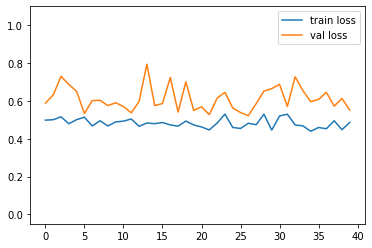

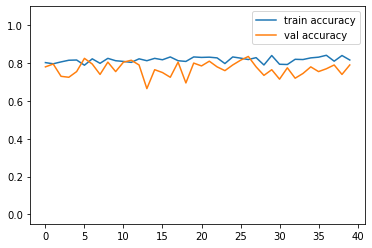

In [37]:
plot_loss_acc()

1/1 [==============================] - 0s 39ms/step


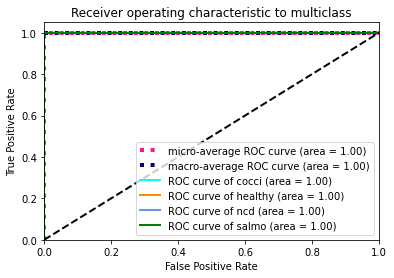

In [38]:
plot_roc_curve()
model.save('./models/resnet1520001_40.h5')

In [39]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=45,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/45
100/100 [==============================] - 36s 362ms/step - loss: 0.4220 - accuracy: 0.8400 - val_loss: 0.6388 - val_accuracy: 0.7600
Epoch 2/45
100/100 [==============================] - 36s 362ms/step - loss: 0.4958 - accuracy: 0.8050 - val_loss: 0.5718 - val_accuracy: 0.8200
Epoch 3/45
100/100 [==============================] - 35s 354ms/step - loss: 0.4502 - accuracy: 0.8413 - val_loss: 0.6863 - val_accuracy: 0.7400
Epoch 4/45
100/100 [==============================] - 34s 345ms/step - loss: 0.4509 - accuracy: 0.8263 - val_loss: 0.5065 - val_accuracy: 0.8300
Epoch 5/45
100/100 [==============================] - 34s 343ms/step - loss: 0.4441 - accuracy: 0.8338 - val_loss: 0.6310 - val_accuracy: 0.7600
Epoch 6/45
100/100 [==============================] - 34s 344ms/step - loss: 0.4704 - accuracy: 0.8238 - val_loss: 0.5557 - val_accuracy: 0.7750
Epoch 7/45
100/100 [==============================] - 34s 342ms/step - loss: 0.4396 - accuracy: 0.8375 - val_loss: 0.6130 - val_ac

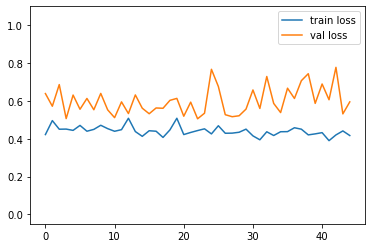

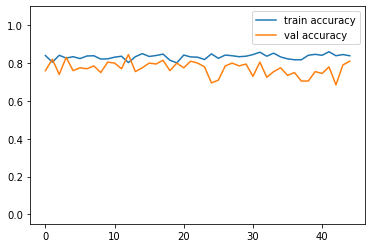

In [40]:
plot_loss_acc()

1/1 [==============================] - 0s 40ms/step


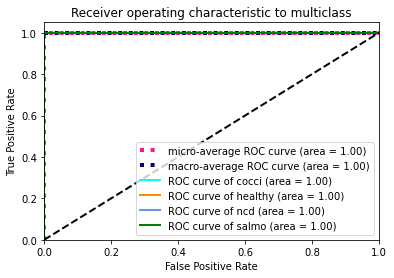

In [41]:
plot_roc_curve()
model.save('./models/resnet1520001_45.h5')

In [42]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/50
100/100 [==============================] - 36s 352ms/step - loss: 0.4348 - accuracy: 0.8388 - val_loss: 0.5160 - val_accuracy: 0.8250
Epoch 2/50
100/100 [==============================] - 35s 348ms/step - loss: 0.4151 - accuracy: 0.8438 - val_loss: 0.6282 - val_accuracy: 0.7600
Epoch 3/50
100/100 [==============================] - 35s 347ms/step - loss: 0.3987 - accuracy: 0.8338 - val_loss: 0.5503 - val_accuracy: 0.7850
Epoch 4/50
100/100 [==============================] - 35s 352ms/step - loss: 0.4191 - accuracy: 0.8487 - val_loss: 0.4957 - val_accuracy: 0.8100
Epoch 5/50
100/100 [==============================] - 35s 351ms/step - loss: 0.4630 - accuracy: 0.8225 - val_loss: 0.7656 - val_accuracy: 0.6400
Epoch 6/50
100/100 [==============================] - 35s 349ms/step - loss: 0.4114 - accuracy: 0.8425 - val_loss: 0.4873 - val_accuracy: 0.8000
Epoch 7/50
100/100 [==============================] - 35s 353ms/step - loss: 0.4241 - accuracy: 0.8400 - val_loss: 0.5791 - val_ac

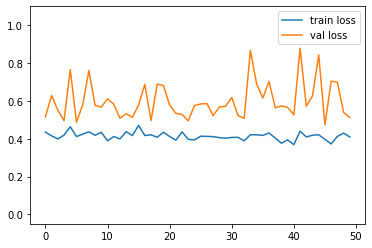

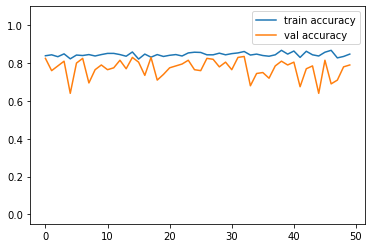

In [43]:
plot_loss_acc()

1/1 [==============================] - 0s 39ms/step


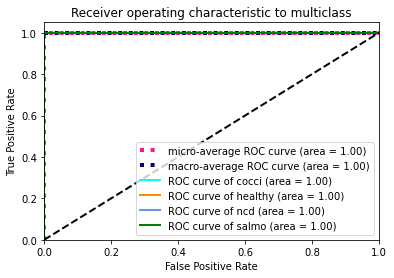

In [44]:
plot_roc_curve()
model.save('./models/resnet1520001_50.h5')

In [45]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=60,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/60
100/100 [==============================] - 35s 348ms/step - loss: 0.3676 - accuracy: 0.8737 - val_loss: 0.4934 - val_accuracy: 0.8300
Epoch 2/60
100/100 [==============================] - 36s 360ms/step - loss: 0.3812 - accuracy: 0.8500 - val_loss: 0.4758 - val_accuracy: 0.8300
Epoch 3/60
100/100 [==============================] - 36s 360ms/step - loss: 0.4050 - accuracy: 0.8487 - val_loss: 0.5291 - val_accuracy: 0.7900
Epoch 4/60
100/100 [==============================] - 36s 363ms/step - loss: 0.3952 - accuracy: 0.8475 - val_loss: 0.5142 - val_accuracy: 0.8200
Epoch 5/60
100/100 [==============================] - 36s 362ms/step - loss: 0.4091 - accuracy: 0.8562 - val_loss: 0.6391 - val_accuracy: 0.7550
Epoch 6/60
100/100 [==============================] - 35s 351ms/step - loss: 0.4243 - accuracy: 0.8500 - val_loss: 0.8869 - val_accuracy: 0.6900
Epoch 7/60
100/100 [==============================] - 35s 354ms/step - loss: 0.4182 - accuracy: 0.8425 - val_loss: 0.6787 - val_ac

100/100 [==============================] - 35s 349ms/step - loss: 0.3745 - accuracy: 0.8450 - val_loss: 0.8068 - val_accuracy: 0.7200
Epoch 58/60
100/100 [==============================] - 36s 361ms/step - loss: 0.3728 - accuracy: 0.8500 - val_loss: 0.5235 - val_accuracy: 0.8300
Epoch 59/60
100/100 [==============================] - 35s 346ms/step - loss: 0.3790 - accuracy: 0.8425 - val_loss: 0.7975 - val_accuracy: 0.6750
Epoch 60/60
100/100 [==============================] - 34s 337ms/step - loss: 0.3761 - accuracy: 0.8687 - val_loss: 0.5979 - val_accuracy: 0.7750


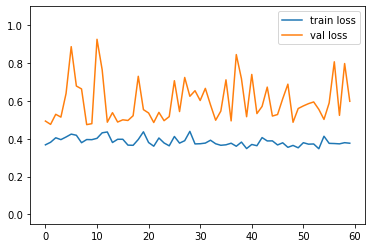

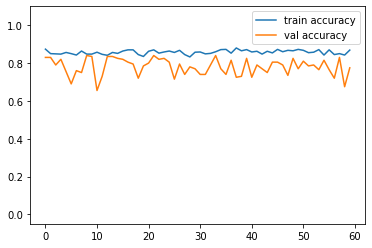

1/1 [==============================] - 0s 42ms/step


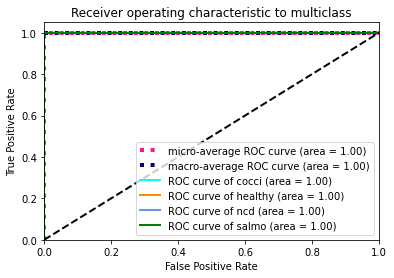

In [46]:
plot_loss_acc()
plot_roc_curve()
model.save('./models/resnet1520001_60.h5')

In [47]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=70,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/70
100/100 [==============================] - 38s 374ms/step - loss: 0.4486 - accuracy: 0.8138 - val_loss: 0.5983 - val_accuracy: 0.8100
Epoch 2/70
100/100 [==============================] - 38s 377ms/step - loss: 0.3613 - accuracy: 0.8775 - val_loss: 0.5538 - val_accuracy: 0.8000
Epoch 3/70
100/100 [==============================] - 38s 376ms/step - loss: 0.3822 - accuracy: 0.8625 - val_loss: 0.5094 - val_accuracy: 0.8500
Epoch 4/70
100/100 [==============================] - 36s 357ms/step - loss: 0.3504 - accuracy: 0.8800 - val_loss: 0.5705 - val_accuracy: 0.7900
Epoch 5/70
100/100 [==============================] - 35s 351ms/step - loss: 0.3871 - accuracy: 0.8612 - val_loss: 0.4756 - val_accuracy: 0.8200
Epoch 6/70
100/100 [==============================] - 35s 350ms/step - loss: 0.3728 - accuracy: 0.8550 - val_loss: 0.5331 - val_accuracy: 0.7850
Epoch 7/70
100/100 [==============================] - 35s 348ms/step - loss: 0.3509 - accuracy: 0.8788 - val_loss: 0.5245 - val_ac

100/100 [==============================] - 36s 358ms/step - loss: 0.3454 - accuracy: 0.8650 - val_loss: 0.4876 - val_accuracy: 0.8200
Epoch 58/70
100/100 [==============================] - 34s 345ms/step - loss: 0.3238 - accuracy: 0.8838 - val_loss: 0.5374 - val_accuracy: 0.7950
Epoch 59/70
100/100 [==============================] - 34s 343ms/step - loss: 0.3529 - accuracy: 0.8700 - val_loss: 0.6239 - val_accuracy: 0.7750
Epoch 60/70
100/100 [==============================] - 34s 343ms/step - loss: 0.3340 - accuracy: 0.8800 - val_loss: 0.5122 - val_accuracy: 0.8150
Epoch 61/70
100/100 [==============================] - 34s 343ms/step - loss: 0.3444 - accuracy: 0.8725 - val_loss: 0.6337 - val_accuracy: 0.7450
Epoch 62/70
100/100 [==============================] - 36s 356ms/step - loss: 0.3460 - accuracy: 0.8750 - val_loss: 0.5414 - val_accuracy: 0.7950
Epoch 63/70
100/100 [==============================] - 35s 348ms/step - loss: 0.3349 - accuracy: 0.8712 - val_loss: 0.5999 - val_accurac

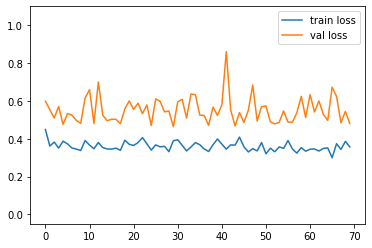

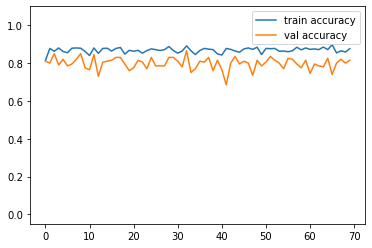

1/1 [==============================] - 0s 38ms/step


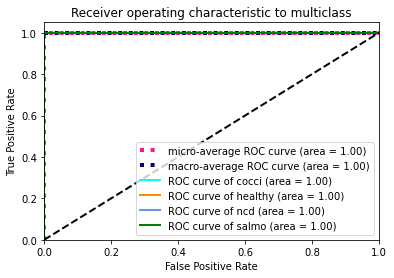

In [48]:
plot_loss_acc()
plot_roc_curve()
model.save('./models/resnet1520001_70.h5')

In [49]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=80,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/80
100/100 [==============================] - 35s 343ms/step - loss: 0.3402 - accuracy: 0.8800 - val_loss: 0.6231 - val_accuracy: 0.7600
Epoch 2/80
100/100 [==============================] - 34s 342ms/step - loss: 0.3211 - accuracy: 0.8800 - val_loss: 0.4920 - val_accuracy: 0.8100
Epoch 3/80
100/100 [==============================] - 34s 341ms/step - loss: 0.3406 - accuracy: 0.8850 - val_loss: 0.4830 - val_accuracy: 0.8400
Epoch 4/80
100/100 [==============================] - 34s 343ms/step - loss: 0.3479 - accuracy: 0.8725 - val_loss: 0.5298 - val_accuracy: 0.8150
Epoch 5/80
100/100 [==============================] - 34s 341ms/step - loss: 0.3671 - accuracy: 0.8612 - val_loss: 0.5320 - val_accuracy: 0.8350
Epoch 6/80
100/100 [==============================] - 34s 342ms/step - loss: 0.3438 - accuracy: 0.8763 - val_loss: 0.4747 - val_accuracy: 0.8550
Epoch 7/80
100/100 [==============================] - 35s 347ms/step - loss: 0.3408 - accuracy: 0.8825 - val_loss: 0.5229 - val_ac

100/100 [==============================] - 34s 344ms/step - loss: 0.3283 - accuracy: 0.8750 - val_loss: 0.5083 - val_accuracy: 0.8100
Epoch 58/80
100/100 [==============================] - 35s 346ms/step - loss: 0.3551 - accuracy: 0.8650 - val_loss: 0.4853 - val_accuracy: 0.8200
Epoch 59/80
100/100 [==============================] - 34s 343ms/step - loss: 0.3273 - accuracy: 0.8813 - val_loss: 0.6886 - val_accuracy: 0.7550
Epoch 60/80
100/100 [==============================] - 34s 344ms/step - loss: 0.3147 - accuracy: 0.8850 - val_loss: 0.6276 - val_accuracy: 0.7950
Epoch 61/80
100/100 [==============================] - 34s 343ms/step - loss: 0.3449 - accuracy: 0.8700 - val_loss: 0.4864 - val_accuracy: 0.8200
Epoch 62/80
100/100 [==============================] - 34s 345ms/step - loss: 0.3628 - accuracy: 0.8687 - val_loss: 0.6705 - val_accuracy: 0.7600
Epoch 63/80
100/100 [==============================] - 34s 343ms/step - loss: 0.3571 - accuracy: 0.8687 - val_loss: 0.4964 - val_accurac

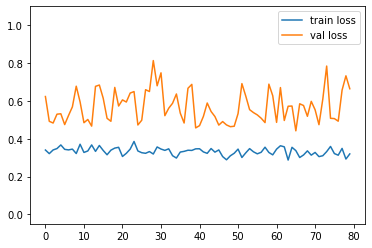

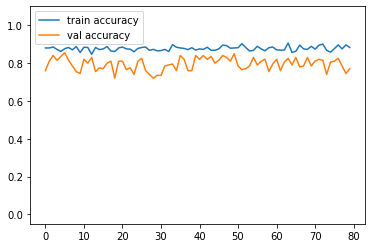

1/1 [==============================] - 0s 38ms/step


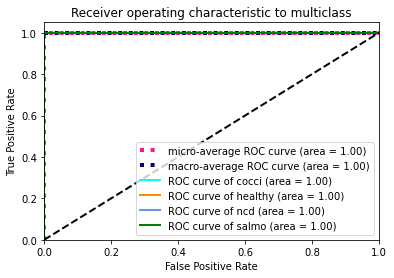

In [50]:
plot_loss_acc()
plot_roc_curve()
model.save('./models/resnet1520001_80.h5')

In [51]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=90,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/90
100/100 [==============================] - 34s 341ms/step - loss: 0.3136 - accuracy: 0.8925 - val_loss: 0.6556 - val_accuracy: 0.7650
Epoch 2/90
100/100 [==============================] - 34s 343ms/step - loss: 0.3211 - accuracy: 0.8850 - val_loss: 0.4955 - val_accuracy: 0.8200
Epoch 3/90
100/100 [==============================] - 34s 341ms/step - loss: 0.3173 - accuracy: 0.8863 - val_loss: 0.5138 - val_accuracy: 0.8100
Epoch 4/90
100/100 [==============================] - 34s 342ms/step - loss: 0.3088 - accuracy: 0.8763 - val_loss: 0.4641 - val_accuracy: 0.8450
Epoch 5/90
100/100 [==============================] - 34s 342ms/step - loss: 0.3316 - accuracy: 0.8725 - val_loss: 0.6235 - val_accuracy: 0.7800
Epoch 6/90
100/100 [==============================] - 34s 342ms/step - loss: 0.3091 - accuracy: 0.8838 - val_loss: 0.5660 - val_accuracy: 0.7950
Epoch 7/90
100/100 [==============================] - 34s 343ms/step - loss: 0.3293 - accuracy: 0.8925 - val_loss: 0.5468 - val_ac

100/100 [==============================] - 34s 343ms/step - loss: 0.3010 - accuracy: 0.8950 - val_loss: 0.4631 - val_accuracy: 0.8300
Epoch 58/90
100/100 [==============================] - 34s 343ms/step - loss: 0.3124 - accuracy: 0.8850 - val_loss: 0.5902 - val_accuracy: 0.7850
Epoch 59/90
100/100 [==============================] - 34s 342ms/step - loss: 0.3333 - accuracy: 0.8612 - val_loss: 0.6171 - val_accuracy: 0.8200
Epoch 60/90
100/100 [==============================] - 34s 341ms/step - loss: 0.2896 - accuracy: 0.9000 - val_loss: 0.5539 - val_accuracy: 0.7850
Epoch 61/90
100/100 [==============================] - 34s 343ms/step - loss: 0.2950 - accuracy: 0.8863 - val_loss: 0.5004 - val_accuracy: 0.8050
Epoch 62/90
100/100 [==============================] - 34s 344ms/step - loss: 0.2718 - accuracy: 0.9112 - val_loss: 0.4580 - val_accuracy: 0.8250
Epoch 63/90
100/100 [==============================] - 34s 343ms/step - loss: 0.3077 - accuracy: 0.8863 - val_loss: 0.5866 - val_accurac

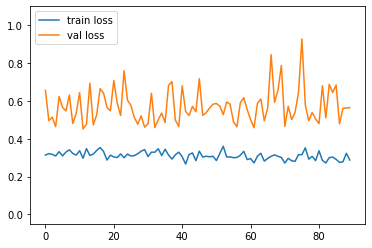

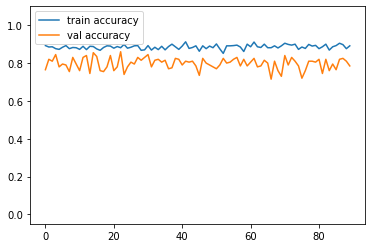

1/1 [==============================] - 0s 37ms/step


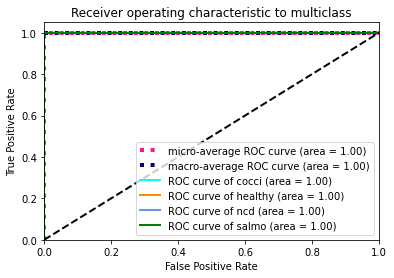

In [52]:
plot_loss_acc()
plot_roc_curve()
model.save('./models/resnet1520001_90.h5')

In [53]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=100,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/100
100/100 [==============================] - 35s 353ms/step - loss: 0.3166 - accuracy: 0.8813 - val_loss: 0.5693 - val_accuracy: 0.7950
Epoch 2/100
100/100 [==============================] - 35s 349ms/step - loss: 0.3177 - accuracy: 0.8775 - val_loss: 0.4957 - val_accuracy: 0.8150
Epoch 3/100
100/100 [==============================] - 34s 344ms/step - loss: 0.2902 - accuracy: 0.8963 - val_loss: 0.5813 - val_accuracy: 0.7800
Epoch 4/100
100/100 [==============================] - 34s 341ms/step - loss: 0.3038 - accuracy: 0.8913 - val_loss: 0.4865 - val_accuracy: 0.8500
Epoch 5/100
100/100 [==============================] - 34s 343ms/step - loss: 0.2943 - accuracy: 0.8938 - val_loss: 0.4964 - val_accuracy: 0.8350
Epoch 6/100
100/100 [==============================] - 34s 344ms/step - loss: 0.3015 - accuracy: 0.8850 - val_loss: 0.5009 - val_accuracy: 0.8100
Epoch 7/100
100/100 [==============================] - 34s 343ms/step - loss: 0.2857 - accuracy: 0.8825 - val_loss: 0.6227 -

Epoch 57/100
100/100 [==============================] - 35s 349ms/step - loss: 0.2864 - accuracy: 0.8888 - val_loss: 0.6716 - val_accuracy: 0.7800
Epoch 58/100
100/100 [==============================] - 36s 357ms/step - loss: 0.3166 - accuracy: 0.8788 - val_loss: 0.5083 - val_accuracy: 0.8650
Epoch 59/100
100/100 [==============================] - 36s 358ms/step - loss: 0.2827 - accuracy: 0.8888 - val_loss: 0.6537 - val_accuracy: 0.7700
Epoch 60/100
100/100 [==============================] - 37s 367ms/step - loss: 0.3091 - accuracy: 0.8763 - val_loss: 0.4463 - val_accuracy: 0.8300
Epoch 61/100
100/100 [==============================] - 35s 349ms/step - loss: 0.2998 - accuracy: 0.8775 - val_loss: 0.5263 - val_accuracy: 0.8050
Epoch 62/100
100/100 [==============================] - 35s 351ms/step - loss: 0.2779 - accuracy: 0.9112 - val_loss: 0.6088 - val_accuracy: 0.8150
Epoch 63/100
100/100 [==============================] - 35s 350ms/step - loss: 0.2621 - accuracy: 0.8950 - val_loss: 0

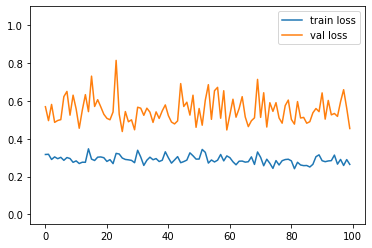

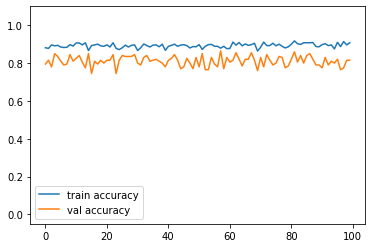

1/1 [==============================] - 0s 42ms/step


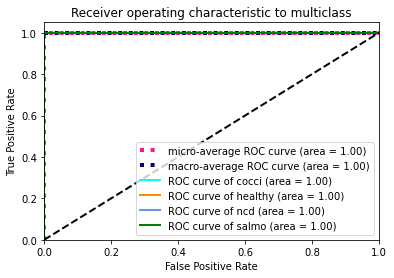

In [54]:
plot_loss_acc()
plot_roc_curve()
model.save('./models/resnet1520001_100.h5')

In [58]:
path = 'D:/MScCS/thesis/Dataset/new/separate testing/ncd/'
count = 0
for i in os.listdir(path):
    filename = path + i
    Image(filename,width=224,height=224)
    img = image.load_img(filename,target_size=(224, 224))

    resizedimg = image.img_to_array(img)
    finalimg = np.expand_dims(resizedimg,axis=0)
    finalimg = tf.keras.applications.resnet.preprocess_input(finalimg)
    finalimg.shape
    predictions = model.predict(finalimg)

    #print(np.argmax(predictions))
    category = np.argmax(predictions)
    if(category == 2):
        count = count + 1
        
print('Total accurate prediction for cocci:', count)

1/1 [==============================] - 0s 31ms/step
Total accurate prediction for cocci: 4


In [ ]:
#29, 26